In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Starbucks satisfactory survey.csv") #reading the csv file
df.head() #will show first 5 entries


,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
#As the column names are very big sentences, we have compresed them down to short variable names.
df.rename({'1. Your Gender' : 'Gender', '2. Your Age' : 'Age', '3. Are you currently....?' : 'Working_Status', '4. What is your annual income?' : 'Annual_Income', '5. How often do you visit Starbucks?' : 'Visit_Frequency', '6. How do you usually enjoy Starbucks?' : 'Prefered Form of Consumption', '7. How much time do you normally  spend during your visit?' : 'Visit_Time', "8. The nearest Starbucks's outlet to you is...?" : 'Nearest_Outlet', '9. Do you have Starbucks membership card?' : 'Membership_Status', '10. What do you most frequently purchase at Starbucks?' : 'Frequently_Purchased', '11. On average, how much would you spend at Starbucks per visit?' : 'Avg_Spend', '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'Overall_Rating', '13. How would you rate the price range at Starbucks?' : 'Price_Rating', '14. How important are sales and promotions in your purchase decision?' : 'Promotion_Rating', '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)' : 'Ambiance_Rating', '16. You rate the WiFi quality at Starbucks as..' : 'Wifi_Rating', '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)' : 'Service_Rating', '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?' : 'Meeting_Rating', '19. How do you come to hear of promotions at Starbucks? Check all that apply.' : 'Promo_Ways', '20. Will you continue buying at Starbucks?' : 'Customer_Loyalty'} , inplace = True , axis = 1)

In [ ]:
df.head()

,Timestamp,Gender,Age,Working_Status,Annual_Income,Visit_Frequency,Prefered Form of Consumption,Visit_Time,Nearest_Outlet,Membership_Status,Frequently_Purchased,Avg_Spend,Overall_Rating,Price_Rating,Promotion_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Meeting_Rating,Promo_Ways,Customer_Loyalty
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
#Shows basic datatypes, columnames, and nuul/non-null count.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Timestamp                     122 non-null    object
 1   Gender                        122 non-null    object
 2   Age                           122 non-null    object
 3   Working_Status                122 non-null    object
 4   Annual_Income                 122 non-null    object
 5   Visit_Frequency               122 non-null    object
 6   Prefered Form of Consumption  121 non-null    object
 7   Visit_Time                    122 non-null    object
 8   Nearest_Outlet                122 non-null    object
 9   Membership_Status             122 non-null    object
 10  Frequently_Purchased          122 non-null    object
 11  Avg_Spend                     122 non-null    object
 12  Overall_Rating                122 non-null    int64 
 13  Price_Rating        

In [ ]:
#Cleaned the data by deleting the tuples having na/NA values
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Timestamp                     121 non-null    object
 1   Gender                        121 non-null    object
 2   Age                           121 non-null    object
 3   Working_Status                121 non-null    object
 4   Annual_Income                 121 non-null    object
 5   Visit_Frequency               121 non-null    object
 6   Prefered Form of Consumption  121 non-null    object
 7   Visit_Time                    121 non-null    object
 8   Nearest_Outlet                121 non-null    object
 9   Membership_Status             121 non-null    object
 10  Frequently_Purchased          121 non-null    object
 11  Avg_Spend                     121 non-null    object
 12  Overall_Rating                121 non-null    int64 
 13  Price_Rating        

In [ ]:
#for showing number of unique values in each column
for column in df.columns:
    print('{} column: {} unique values'.format(column,df[column].nunique()))

Timestamp column: 121 unique values
Gender column: 2 unique values
Age column: 4 unique values
Working_Status column: 4 unique values
Annual_Income column: 5 unique values
Visit_Frequency column: 5 unique values
Prefered Form of Consumption column: 8 unique values
Visit_Time column: 5 unique values
Nearest_Outlet column: 3 unique values
Membership_Status column: 2 unique values
Frequently_Purchased column: 19 unique values
Avg_Spend column: 4 unique values
Overall_Rating column: 5 unique values
Price_Rating column: 5 unique values
Promotion_Rating column: 5 unique values
Ambiance_Rating column: 5 unique values
Wifi_Rating column: 5 unique values
Service_Rating column: 5 unique values
Meeting_Rating column: 5 unique values
Promo_Ways column: 31 unique values
Customer_Loyalty column: 2 unique values


In [ ]:
#Replacing repeated values into a single value thus reducing number of unique values.
df['Prefered Form of Consumption'] = df['Prefered Form of Consumption'].replace({'Never':'None','never':'None','Never buy':'None','Never ':'None','I dont like coffee':'None'})
df['Frequently_Purchased'] = df['Frequently_Purchased'].replace({'Never buy any':'Nothing','never':'Nothing','Never':'Nothing','Jaws chip ':'Jaws Chip','cake ':'Cake'})

#Giving rank to the visit frequencies by replacing them into integer values.
df['Visit_Frequency'] = df['Visit_Frequency'].replace({'Never':0, 'Rarely':1,'Monthly':2,'Weekly':3,"Daily":4})


In [ ]:
#deleting the tuples where the visit frequencies are 0(i.e. the customer has never visited)
df=df[(df.Visit_Frequency != 0)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Timestamp                     113 non-null    object
 1   Gender                        113 non-null    object
 2   Age                           113 non-null    object
 3   Working_Status                113 non-null    object
 4   Annual_Income                 113 non-null    object
 5   Visit_Frequency               113 non-null    int64 
 6   Prefered Form of Consumption  113 non-null    object
 7   Visit_Time                    113 non-null    object
 8   Nearest_Outlet                113 non-null    object
 9   Membership_Status             113 non-null    object
 10  Frequently_Purchased          113 non-null    object
 11  Avg_Spend                     113 non-null    object
 12  Overall_Rating                113 non-null    int64 
 13  Price_Rating        

In [ ]:
#After replacing and cleanig the data, we can see that the number of unique values have reduced.
for column in df.columns:
    print('{} column: {} unique values'.format(column,df[column].nunique()))

Timestamp column: 113 unique values
Gender column: 2 unique values
Age column: 4 unique values
Working_Status column: 4 unique values
Annual_Income column: 5 unique values
Visit_Frequency column: 4 unique values
Prefered Form of Consumption column: 4 unique values
Visit_Time column: 5 unique values
Nearest_Outlet column: 3 unique values
Membership_Status column: 2 unique values
Frequently_Purchased column: 15 unique values
Avg_Spend column: 4 unique values
Overall_Rating column: 5 unique values
Price_Rating column: 5 unique values
Promotion_Rating column: 5 unique values
Ambiance_Rating column: 5 unique values
Wifi_Rating column: 5 unique values
Service_Rating column: 4 unique values
Meeting_Rating column: 5 unique values
Promo_Ways column: 29 unique values
Customer_Loyalty column: 2 unique values


In [ ]:
df.head()

,Timestamp,Gender,Age,Working_Status,Annual_Income,Visit_Frequency,Prefered Form of Consumption,Visit_Time,Nearest_Outlet,Membership_Status,Frequently_Purchased,Avg_Spend,Overall_Rating,Price_Rating,Promotion_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Meeting_Rating,Promo_Ways,Customer_Loyalty
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",1,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",1,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",2,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",1,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",2,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


MAKING BAR-GRAPHS FOR DIFFERENT COLUMNS OF DATASET

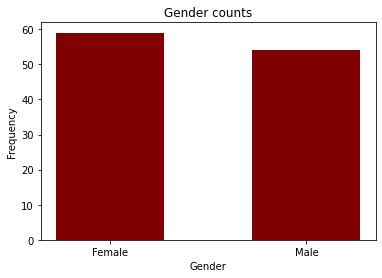

In [ ]:
gender_count={}
for i in df.Gender:
  if i not in gender_count:
    gender_count[i] = 1
  else:
    gender_count[i] += 1
genders = list(gender_count.keys())
values = gender_count.values()
plt.bar(range(len(gender_count)), values, tick_label=genders, color="maroon", width=0.55)
plt.title("Gender counts")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

Here we can observe that number of female customers are comparitively more than the male customers


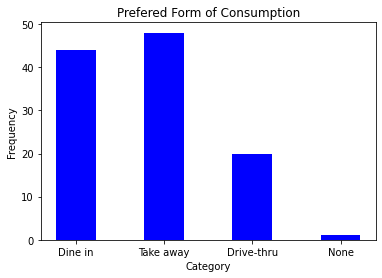

In [ ]:
consumption_count={}
for i in df['Prefered Form of Consumption']:
  if i not in consumption_count:
    consumption_count[i] = 1
  else:
    consumption_count[i] += 1
consumptions = list(consumption_count.keys())
values = consumption_count.values()
plt.bar(range(len(consumption_count)), values, tick_label=consumptions, color="blue", width=0.45)
plt.title("Prefered Form of Consumption")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

More people prefer Take away than dine-in.

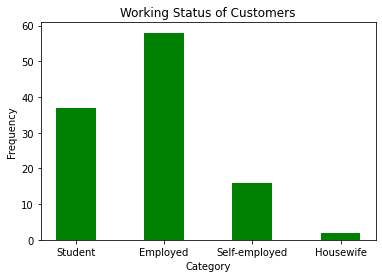

In [ ]:
work_count={}
for i in df['Working_Status']:
  if i not in work_count:
    work_count[i] = 1
  else:
    work_count[i] += 1
works = list(work_count.keys())
values = work_count.values()
plt.bar(range(len(work_count)), values, tick_label=works, color="green", width=0.45)
plt.title("Working Status of Customers")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

Number of working people and student are more than the others.

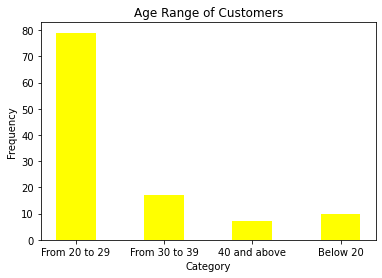

In [ ]:
age_count={}
for i in df['Age']:
  if i not in age_count:
    age_count[i] = 1
  else:
    age_count[i] += 1
ages = list(age_count.keys())
values = age_count.values()
plt.bar(range(len(age_count)),values, tick_label=ages, color="yellow", width=0.45 )
plt.title("Age Range of Customers")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

As we saw that students and employed workers are a majority, we can also see that people of age group 20-29 are the most frequent visitors.

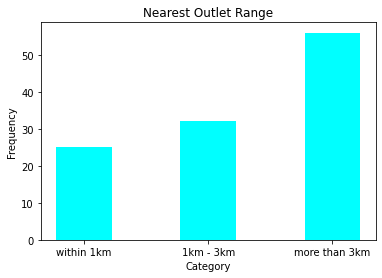

In [ ]:
near_count={}
for i in df['Nearest_Outlet']:
  if i not in near_count:
    near_count[i] = 1
  else:
    near_count[i] += 1
nears = list(near_count.keys())
values = near_count.values()
plt.bar(range(len(near_count)),values, tick_label=nears, color="cyan", width=0.45 )
plt.title("Nearest Outlet Range")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

As we know that Starbucks is a luxury coffee chain, we ca see that customers are willing to travel large distances in order to have a coffee.

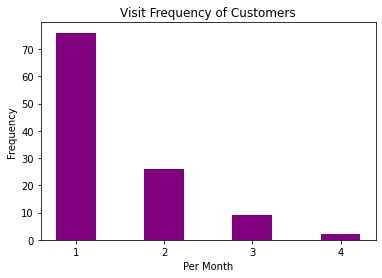

In [ ]:
frequency_count={}
for i in df['Visit_Frequency']:
  if i not in frequency_count:
    frequency_count[i] = 1
  else:
    frequency_count[i] += 1
frequencys = list(frequency_count.keys())
values = frequency_count.values()
plt.bar(range(len(frequency_count)),values, tick_label=frequencys, color="purple", width=0.45 )
plt.title("Visit Frequency of Customers")
plt.xlabel("Per Month")
plt.ylabel("Frequency")
plt.show()

#1-rarely
#2-monthly
#3-weekly
#4-daily

We can see that the customers don't visit starbucks very frequently.

In [ ]:
#Tells us about the count, mean, median, min/max values and gives IQR i.e. Q1(25%),Q3(75%)
df.describe()

,Visit_Frequency,Overall_Rating,Price_Rating,Promotion_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Meeting_Rating
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1.442478,3.743363,2.929204,3.876106,3.840708,3.283186,3.814159,3.539823
std,0.718854,0.894215,1.083289,1.036243,0.861543,0.967960,0.796742,1.026744
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,2.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#Extractig columns with integer values
num_cols = df.select_dtypes(include='int64').columns
num_cols


Index(['Visit_Frequency', 'Overall_Rating', 'Price_Rating', 'Promotion_Rating',
       'Ambiance_Rating', 'Wifi_Rating', 'Service_Rating', 'Meeting_Rating'],
      dtype='object')

MAKIG BOX PLOTS OF ALL THE INTEGER VALUE COLUMNS.

Plots for Column: Visit_Frequency


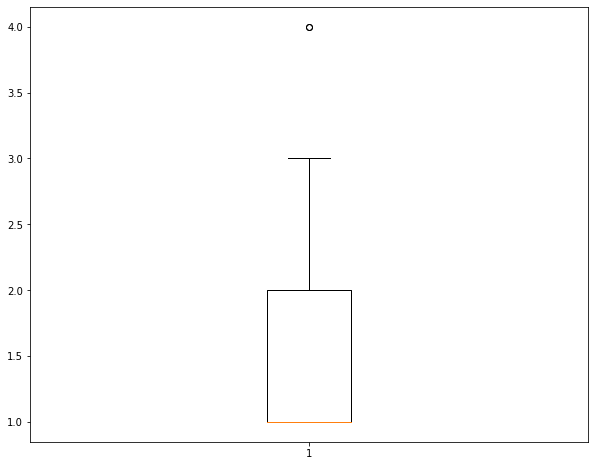

Quantiles
0.01    1.0
0.03    1.0
0.10    1.0
0.20    1.0
0.50    1.0
0.75    2.0
0.90    2.0
1.00    4.0
Name: Visit_Frequency, dtype: float64


Plots for Column: Overall_Rating


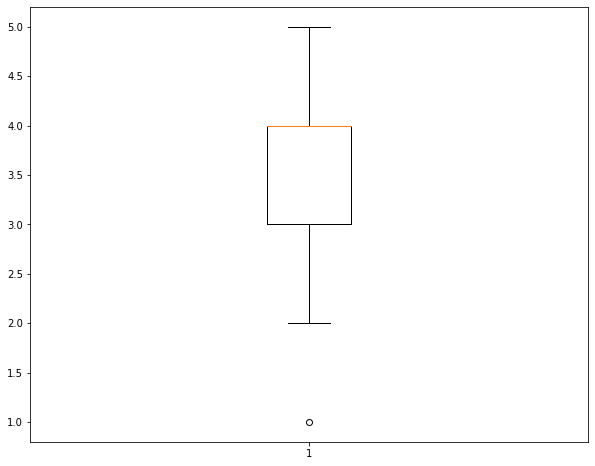

Quantiles
0.01    2.0
0.03    2.0
0.10    3.0
0.20    3.0
0.50    4.0
0.75    4.0
0.90    5.0
1.00    5.0
Name: Overall_Rating, dtype: float64


Plots for Column: Price_Rating


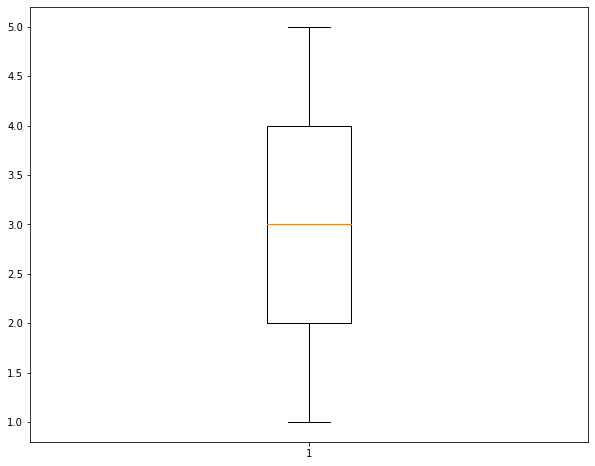

Quantiles
0.01    1.0
0.03    1.0
0.10    1.2
0.20    2.0
0.50    3.0
0.75    4.0
0.90    4.0
1.00    5.0
Name: Price_Rating, dtype: float64


Plots for Column: Promotion_Rating


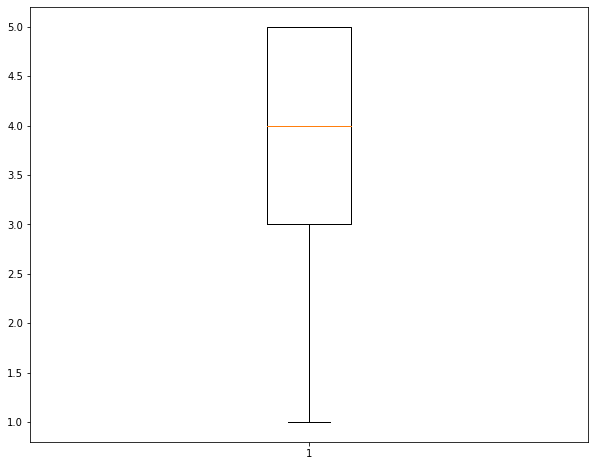

Quantiles
0.01    1.00
0.03    1.36
0.10    3.00
0.20    3.00
0.50    4.00
0.75    5.00
0.90    5.00
1.00    5.00
Name: Promotion_Rating, dtype: float64


Plots for Column: Ambiance_Rating


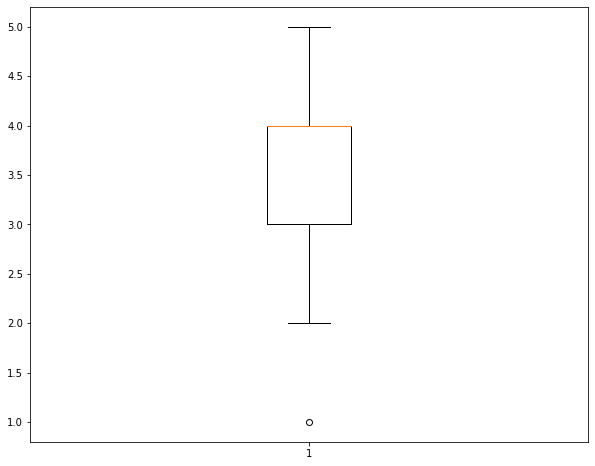

Quantiles
0.01    2.0
0.03    2.0
0.10    3.0
0.20    3.0
0.50    4.0
0.75    4.0
0.90    5.0
1.00    5.0
Name: Ambiance_Rating, dtype: float64


Plots for Column: Wifi_Rating


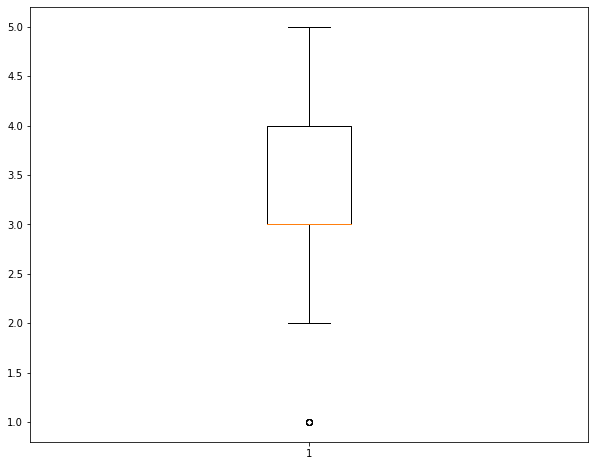

Quantiles
0.01    1.0
0.03    1.0
0.10    2.0
0.20    3.0
0.50    3.0
0.75    4.0
0.90    4.0
1.00    5.0
Name: Wifi_Rating, dtype: float64


Plots for Column: Service_Rating


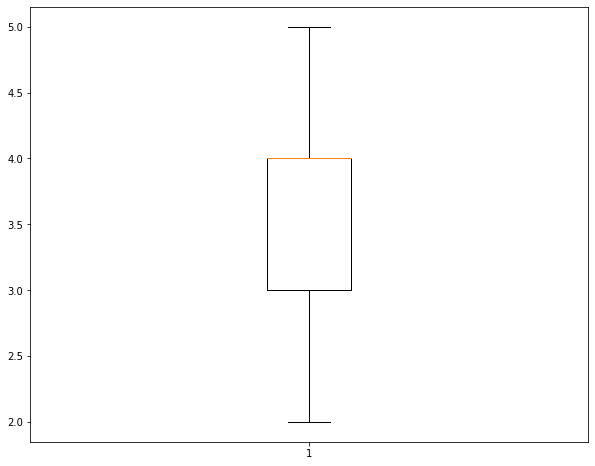

Quantiles
0.01    2.00
0.03    2.36
0.10    3.00
0.20    3.00
0.50    4.00
0.75    4.00
0.90    5.00
1.00    5.00
Name: Service_Rating, dtype: float64


Plots for Column: Meeting_Rating


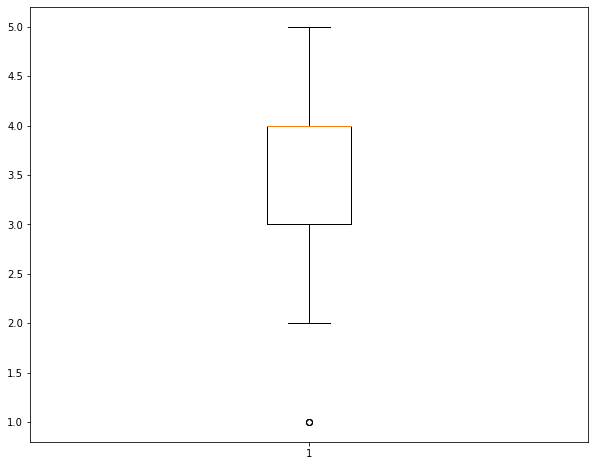

Quantiles
0.01    1.0
0.03    2.0
0.10    2.0
0.20    3.0
0.50    4.0
0.75    4.0
0.90    5.0
1.00    5.0
Name: Meeting_Rating, dtype: float64




In [ ]:
def plot_numeric(df,x):
    plt.figure(figsize=(10,8))
    plt.boxplot(df[i], vert=True)
    plt.show()
    print('Quantiles')
    print(df[i].quantile([0.01,0.03,0.1,0.2,0.5,0.75,0.9,1.0]))
    
for i in num_cols:
    print("Plots for Column: "+ i)
    plot_numeric(df,i)
    print("\n")

In [ ]:
#counts how frequently customers visit Starbucks
df['Visit_Frequency'].value_counts()
#1-rarely
#2-monthly
#3-weekly
#4-daily

1    76
2    26
3     9
4     2
Name: Visit_Frequency, dtype: int64

In [ ]:
#Giving age-groups- numerical rankings
df['Age'] = df['Age'].replace({'Below 20':1, 'From 20 to 29':2,'From 30 to 39':3,'40 and above':4})

In [ ]:
df.head()

,Timestamp,Gender,Age,Working_Status,Annual_Income,Visit_Frequency,Prefered Form of Consumption,Visit_Time,Nearest_Outlet,Membership_Status,Frequently_Purchased,Avg_Spend,Overall_Rating,Price_Rating,Promotion_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Meeting_Rating,Promo_Ways,Customer_Loyalty
0,2019/10/01 12:38:43 PM GMT+8,Female,2,Student,"Less than RM25,000",1,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,2,Student,"Less than RM25,000",1,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,2,Employed,"Less than RM25,000",2,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,2,Student,"Less than RM25,000",1,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,2,Student,"Less than RM25,000",2,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
#Creating a new database with only columns having integer values in order to do modelling
df1=df[['Age','Visit_Frequency','Overall_Rating','Price_Rating','Promotion_Rating','Ambiance_Rating','Wifi_Rating','Service_Rating','Meeting_Rating']]

In [ ]:
df1

,Age,Visit_Frequency,Overall_Rating,Price_Rating,Promotion_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Meeting_Rating
0,2,1,4,3,5,5,4,4,3
1,2,1,4,3,4,4,4,5,2
2,2,2,4,3,4,4,4,4,3
3,2,1,2,1,4,3,3,3,3
4,2,2,3,3,4,2,2,3,3
...,...,...,...,...,...,...,...,...,...
117,4,2,3,3,5,3,2,4,4
118,2,2,5,5,5,5,5,5,5
119,2,1,3,2,4,3,3,3,4
120,2,1,4,4,4,4,4,4,4


In [ ]:
#Giving X all the values accept the target variable(Visit frequency)
#Y=target variable
X = df1.drop('Visit_Frequency', axis = 1)
y = df1['Visit_Frequency']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3) #training data=30% of dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

DEFINING DIFFERENT CLASSIFICATION MODELS AND CHECKING ACCURACIES OF THE SAME, THEREBY FINDING THE MOST ACCURATE/SUITABLE MODEL.

In [ ]:
Dt_model = tree.fit(X_train,y_train)

In [ ]:
Dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
score_acc1 = accuracy_score(y_test, Dt_model.predict(X_test))
score_acc1

0.5882352941176471

In [ ]:
rf_model = rf.fit(X_train,y_train)

In [ ]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
score_acc2 = accuracy_score(y_test, rf_model.predict(X_test))
score_acc2

0.6176470588235294

We can see that random forest claasifier has the highest accuracy score